In [2]:
!pip install lifelines


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 14.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=030ae57c44b34458729787e5a2648e68c3b0e3ab447d2aafd3e98c73b1cbd328
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [9]:
# import potential libraries for data analysis
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import lifelines as ll

# allow display of multiple outputs by running one code cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In this lab, we will apply learned concepts about survival analysis lecture to analyze customer churn for a telecom company.

Customer Churn is a well-studied problem in ML, which mainly aims to predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

The given Customer-Churn.csv dataset contains 7k+ customer data points. The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

This lab contains three parts. In step 1, you will need to perform basic data exploration and data cleaning. In step 2, you will need to draw Kaplan-Meier for overall data and different user groups. In the last step 3, you will need to apply Cox Proportional Hazards model on the dataset to learn the important features for explaining customer churn.

Step 1: Data Type Exploration

First, answer the following three questions using code and results.
1) How many data entries/objects? **7043 x 21 column**
2) What are the attribute types? **most of them are objects others are int and float**
3) Are there any missing values? **no missing values**

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,2,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,4,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,5,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int64  
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,3522.000000,0.162147,32.371149,64.761692
std,2033.283305,0.368612,24.559481,30.090047
min,1.000000,0.000000,0.000000,18.250000
25%,1761.500000,0.000000,9.000000,35.500000
50%,3522.000000,0.000000,29.000000,70.350000
75%,5282.500000,0.000000,55.000000,89.850000
max,7043.000000,1.000000,72.000000,118.750000


<Axes: >

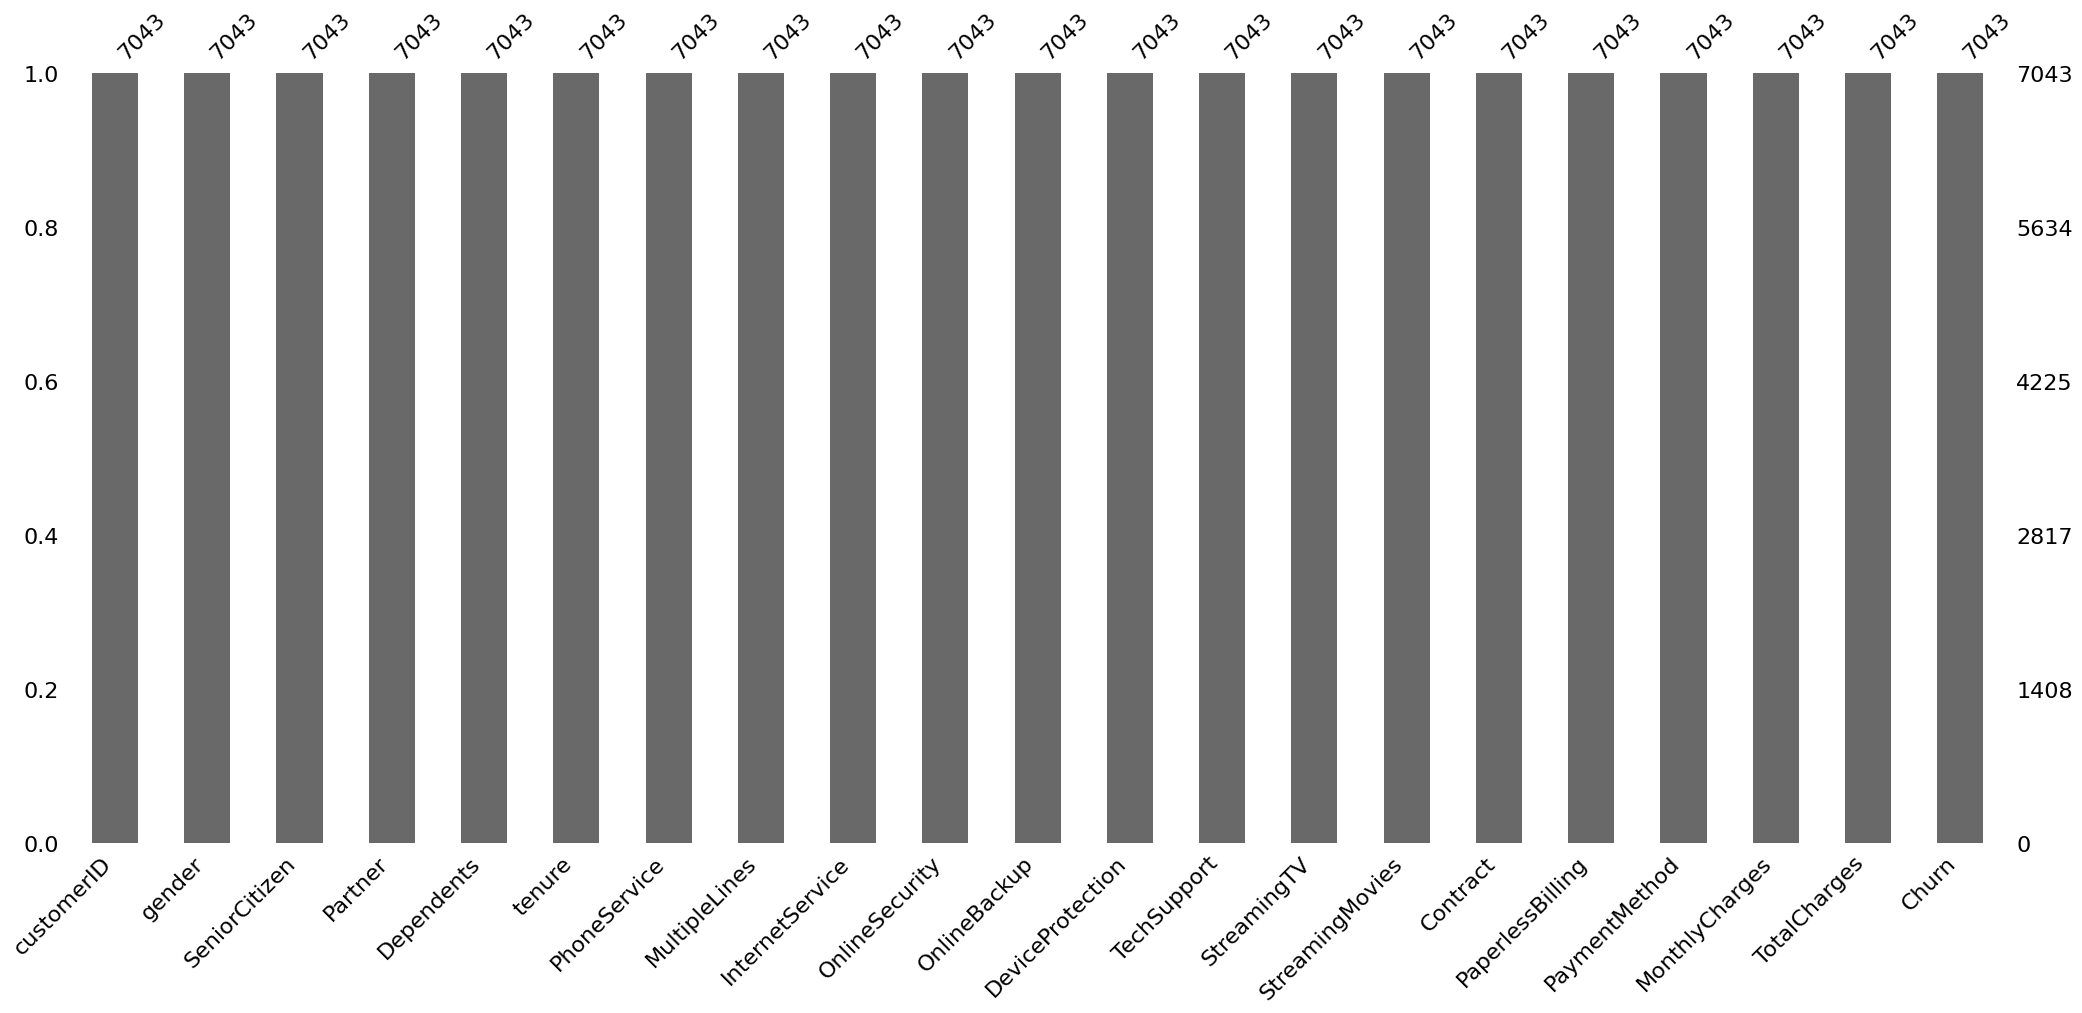

In [12]:
# put your code for implementing Step 1 in this code block
# you many need pd.read_csv, pd.head(), pd.info(), pd.describe(), msno.bar()

all_data = pd.read_csv('Customer-Churn.csv')
all_data.head()
all_data.info()
all_data.describe()
msno.bar(all_data)

Step 2: Plot KaplanMeier curve to describe churn data, note you need to transfer attribute "tenure" to float adn Churn to bool attribute.

1) first plot the KM curve for all users.
2) secondly, plot the KM curve for users grouped by their Payment Method
3) thirdly, plot the KM curve for users grouped by their Contract method

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,2,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,4,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,5,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 7043 total observations, 5174 right-censored observations>

<Axes: xlabel='timeline'>

Text(0.5, 1.0, 'Kaplan-Meier Curve for All Users')

Text(0.5, 0, 'Tenure')

Text(0, 0.5, 'Survival Probability')

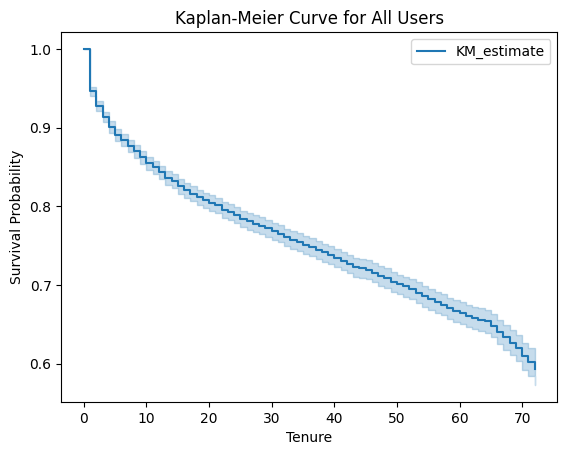

<Figure size 1000x600 with 0 Axes>

<lifelines.KaplanMeierFitter:"Electronic check", fitted with 2365 total observations, 1294 right-censored observations>

<Axes: xlabel='timeline'>

<lifelines.KaplanMeierFitter:"Mailed check", fitted with 1612 total observations, 1304 right-censored observations>

<Axes: xlabel='timeline'>

<lifelines.KaplanMeierFitter:"Bank transfer (automatic)", fitted with 1544 total observations, 1286 right-censored observations>

<Axes: xlabel='timeline'>

<lifelines.KaplanMeierFitter:"Credit card (automatic)", fitted with 1522 total observations, 1290 right-censored observations>

<Axes: xlabel='timeline'>

Text(0.5, 1.0, 'Kaplan-Meier Curve by Payment Method')

Text(0.5, 0, 'Tenure')

Text(0, 0.5, 'Survival Probability')

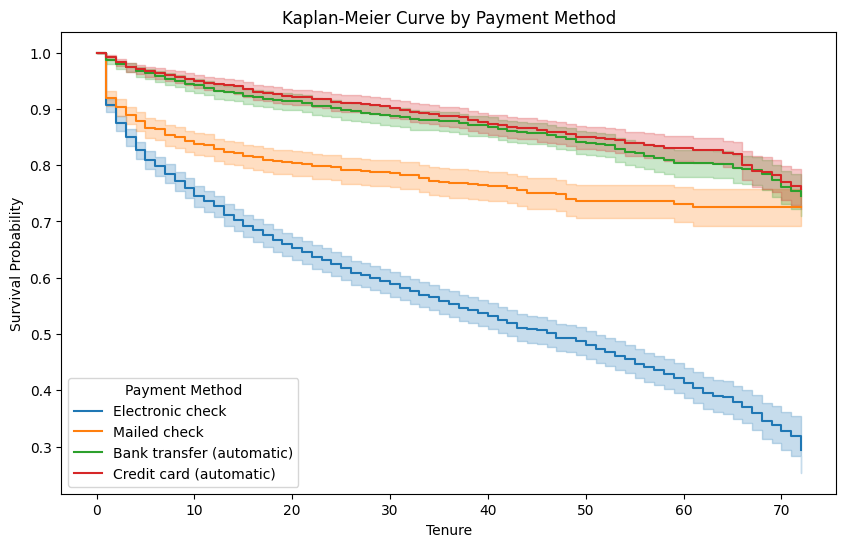

<Figure size 1000x600 with 0 Axes>

<lifelines.KaplanMeierFitter:"Month-to-month", fitted with 3875 total observations, 2220 right-censored observations>

<Axes: xlabel='timeline'>

<lifelines.KaplanMeierFitter:"One year", fitted with 1473 total observations, 1307 right-censored observations>

<Axes: xlabel='timeline'>

<lifelines.KaplanMeierFitter:"Two year", fitted with 1695 total observations, 1647 right-censored observations>

<Axes: xlabel='timeline'>

Text(0.5, 1.0, 'Kaplan-Meier Curve by Contract Method')

Text(0.5, 0, 'Tenure')

Text(0, 0.5, 'Survival Probability')

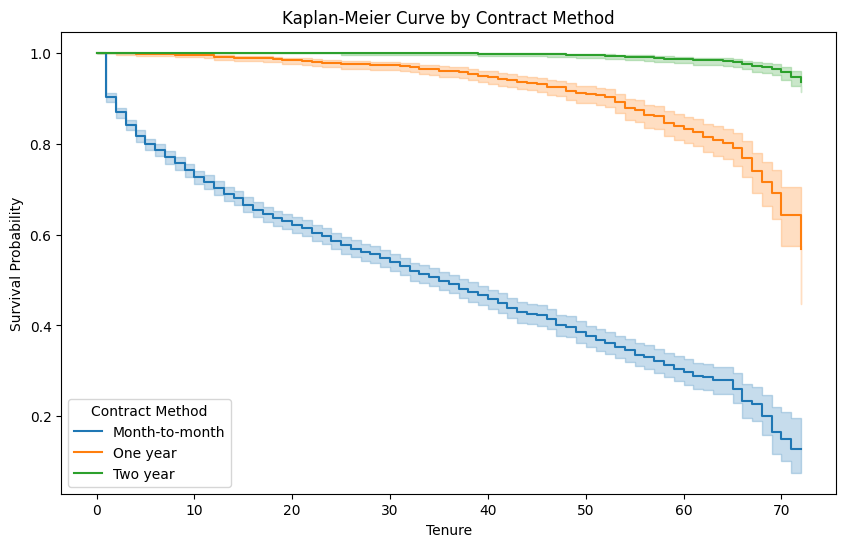

In [13]:
# transform tenure and churn features
from sklearn.preprocessing import LabelEncoder
from lifelines import KaplanMeierFitter
label_encoder = LabelEncoder()
# Fit and transform the Churn column
all_data['Churn'] = label_encoder.fit_transform(all_data['Churn'])
all_data['tenure'] = all_data['tenure'].astype(float)
all_data.head()

# fitting kmf to all churn data, you may use the KaplanMeierFitter() from lifelines
kmf = KaplanMeierFitter()
# Fit the KM model for all users
kmf.fit(durations=all_data['tenure'], event_observed=all_data['Churn'])
# plotting kmf curve
kmf.plot()
plt.title('Kaplan-Meier Curve for All Users')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.show()


# creating Kaplan-Meier curve plots segmented by categorical variables, i.e., PaymentMethod, Contract.
# Group by Payment Method and plot KM curves
plt.figure(figsize=(10, 6))

for method in all_data['PaymentMethod'].unique():
    kmf.fit(durations=all_data[all_data['PaymentMethod'] == method]['tenure'],
            event_observed=all_data[all_data['PaymentMethod'] == method]['Churn'],
            label=method)
    kmf.plot()

plt.title('Kaplan-Meier Curve by Payment Method')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.legend(title='Payment Method')
plt.show()



# Group by Contract method and plot KM curves
plt.figure(figsize=(10, 6))

for contract in all_data['Contract'].unique():
    kmf.fit(durations=all_data[all_data['Contract'] == contract]['tenure'],
            event_observed=all_data[all_data['Contract'] == contract]['Churn'],
            label=contract)
    kmf.plot()

plt.title('Kaplan-Meier Curve by Contract Method')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.legend(title='Contract Method')
plt.show()





Step 3: Feature engineering and build Cox Proportional Hazards using all churn data.
You may use CoxPHFitter, and print_summary from lifelines library

In [16]:
# Now, based on your above check, carefully read the attributes_des.txt file which contains the detailed description for each attribute.
# then, decide how to handle the categorical features in this dataset. Be careful about "TotalCharges".
# You may consider using pd.get_dummies(data, drop_first=True, columns=one_hot_encoded_columns) to one-hot encode some categorical features.
# Replace empty strings or non-numeric values with '0'
all_data['TotalCharges'] = all_data['TotalCharges'].replace(' ', '0')
# Convert the column to float
all_data['TotalCharges'] = all_data['TotalCharges'].astype(float)
# List of columns to be one-hot encoded
one_hot_encoded_columns = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]

# Apply one-hot encoding
df_encoded = pd.get_dummies(all_data, columns=one_hot_encoded_columns, drop_first=True)

# Display the resulting DataFrame
print(df_encoded)



      customerID  SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  \
0              1              0     1.0           29.85         29.85      0   
1              2              0    34.0           56.95       1889.50      0   
2              3              0     2.0           53.85        108.15      1   
3              4              0    45.0           42.30       1840.75      0   
4              5              0     2.0           70.70        151.65      1   
...          ...            ...     ...             ...           ...    ...   
7038        7039              0    24.0           84.80       1990.50      0   
7039        7040              0    72.0          103.20       7362.90      0   
7040        7041              0    11.0           29.60        346.45      0   
7041        7042              1     4.0           74.40        306.60      1   
7042        7043              0    66.0          105.65       6844.50      0   

      gender_Male  Partner_Yes  Depende

In [17]:
df_encoded.columns

Index(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [20]:

# train your Cox Proportional Hazard model using the processed data and print the summary

from lifelines import CoxPHFitter

# Initialize the Cox Proportional Hazards model
cph = CoxPHFitter(penalizer=0.1)
cph.fit(df_encoded, duration_col='tenure', event_col='Churn')

# Print the summary of the model
cph.print_summary()




<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -13928.28
         time fit was run = 2024-05-28 07:06:19 UTC

---
                                        coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                     
customerID                              0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
SeniorCitizen                           0.05       1.05       0.05            -0.05             0.14                 0.95                 1.15
MonthlyCharges                          0.00       1.00       0.00             0.00             0.01                 1.00                 1.01
TotalCharges                           -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
gender_Male                            -0.03       0.97       0.04            -0.11             0.04                 0.89                 1.04
Partner_Yes                            -0.31       0.73       0.04            -0.39            -0.23                 0.67                 0.80
Dependents_Yes                         -0.15       0.86       0.05            -0.25            -0.05                 0.78                 0.95
PhoneService_Yes                        0.11       1.12       0.10            -0.08             0.31                 0.92                 1.36
MultipleLines_No phone service         -0.11       0.89       0.10            -0.31             0.08                 0.74                 1.09
MultipleLines_Yes                      -0.15       0.86       0.04            -0.24            -0.07                 0.79                 0.94
InternetService_Fiber optic             0.47       1.60       0.05             0.37             0.58                 1.45                 1.78
InternetService_No                     -0.22       0.80       0.09            -0.39            -0.06                 0.68                 0.95
OnlineSecurity_No internet service     -0.22       0.80       0.09            -0.39            -0.06                 0.68                 0.95
OnlineSecurity_Yes                     -0.43       0.65       0.05            -0.52            -0.33                 0.59                 0.72
OnlineBackup_No internet service       -0.22       0.80       0.09            -0.39            -0.06                 0.68                 0.95
OnlineBackup_Yes                       -0.31       0.73       0.04            -0.40            -0.22                 0.67                 0.80
DeviceProtection_No internet service   -0.22       0.80       0.09            -0.39            -0.06                 0.68                 0.95
DeviceProtection_Yes                   -0.18       0.83       0.05            -0.27            -0.09                 0.76                 0.91
TechSupport_No internet service        -0.22       0.80       0.09            -0.39            -0.06                 0.68                 0.95
TechSupport_Yes                        -0.34       0.71       0.05            -0.43            -0.24                 0.65                 0.79
StreamingTV_No internet service        -0.22       0.80       0.09            -0.39            -0.06                 0.68                 0.95
StreamingTV_Yes                         0.04       1.04       0.04            -0.05             0.12                 0.95                 1.13
StreamingMovies_No internet service    -0.22       0.80       0.09            -0.39            -0.06                 0.68                 0